In [1]:
# import library
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
ghg = pd.read_excel('./Air/UK-local-authority-ghg-emissions-2020.xlsx', sheet_name='1_1', header=4)

In [6]:
ghg.head()

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,North East,Darlington,Darlington,E06000005,2005,62.036499,119.155609,0.044477,38.400224,219.636808,...,[x],[x],[x],5.210130,[x],[x],100.287,[x],197.4758,[x]
1,North East,Darlington,Darlington,E06000005,2006,66.262990,101.399615,0.064246,37.895255,205.622106,...,[x],[x],[x],5.993371,[x],[x],101.509,[x],197.4758,[x]
2,North East,Darlington,Darlington,E06000005,2007,62.523282,98.867838,0.072696,38.524724,199.988540,...,[x],[x],[x],6.261497,[x],[x],102.632,[x],197.4758,[x]
3,North East,Darlington,Darlington,E06000005,2008,61.789919,98.971476,0.054675,36.836290,197.652360,...,[x],[x],[x],6.187884,[x],[x],103.694,[x],197.4758,[x]
4,North East,Darlington,Darlington,E06000005,2009,54.544812,85.262146,1.150344,25.105354,166.062656,...,[x],[x],[x],5.494642,[x],[x],104.355,[x],197.4758,[x]


In [17]:
df = ghg.loc[:,['Local Authority Code','Local Authority','Region/Country','Calendar Year','Emissions per km2 (kt CO2e)']]

In [18]:
greenhouse = df.loc[df['Calendar Year']==2020,:]

In [44]:
greenhouse

,Local Authority Code,Local Authority,Region/Country,Calendar Year,Emissions per km2 (kt CO2e)
15,E06000005,Darlington,North East,2020,2.815252
31,E06000047,County Durham,North East,2020,1.210489
47,E08000037,Gateshead,North East,2020,6.869158
63,E06000001,Hartlepool,North East,2020,6.479826
79,E06000002,Middlesbrough,North East,2020,12.203143
...,...,...,...,...,...
6623,N09000010,"Newry, Mourne and Down",Northern Ireland,2020,1.087534
6639,NaN,Northern Ireland Total,Northern Ireland Total,2020,1.47565
6655,NaN,Large elec users (high voltage lines) unknown ...,Unallocated,2020,0
6671,NaN,Unallocated,Unallocated,2020,0


In [45]:
greenhouse.to_csv(r'./OUTPUT/Climate_change.csv')

In [11]:
polygon = gpd.read_file(r'./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [12]:
england = pd.read_excel('England_class.xlsx')

In [13]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [14]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

In [19]:
england_ghg = pd.merge(england_poly_geo, greenhouse, left_on='LAD', right_on='Local Authority Code', how='left')

In [34]:
greenhouse_gas = england_ghg.iloc[:309,:]

In [41]:
greenhouse_gas

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,...,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,Local Authority Code,Local Authority,Region/Country,Calendar Year,Emissions per km2 (kt CO2e)
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,...,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",E06000001,Hartlepool,North East,2020.0,6.479826
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,...,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",E06000002,Middlesbrough,North East,2020.0,12.203143
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,...,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",E06000003,Redcar and Cleveland,North East,2020.0,6.865742
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,...,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",E06000004,Stockton-on-Tees,North East,2020.0,12.303649
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,...,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",E06000005,Darlington,North East,2020.0,2.815252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,E09000029,Sutton,England,London,E13000002,Outer London,305.0,E09000029,Sutton,527357.0,...,-0.17226,51.357552,39927.915712,4.384769e+07,"POLYGON ((527085.942 167617.691, 527087.729 16...",E09000029,Sutton,London,2020.0,13.39499
305,E09000030,Tower Hamlets,England,London,E13000001,Inner London,306.0,E09000030,Tower Hamlets,536340.0,...,-0.03647,51.515541,26818.136105,2.157691e+07,"POLYGON ((536776.386 184446.881, 536777.600 18...",E09000030,Tower Hamlets,London,2020.0,50.11174
306,E09000031,Waltham Forest,England,London,E13000002,Outer London,307.0,E09000031,Waltham Forest,537328.0,...,-0.01880,51.594608,33346.575271,3.881023e+07,"POLYGON ((537921.098 196048.201, 537947.499 19...",E09000031,Waltham Forest,London,2020.0,18.318119
307,E09000032,Wandsworth,England,London,E13000001,Inner London,308.0,E09000032,Wandsworth,525152.0,...,-0.20021,51.452400,37444.099887,3.521603e+07,"POLYGON ((530059.620 177871.478, 530066.940 17...",E09000032,Wandsworth,London,2020.0,24.297599


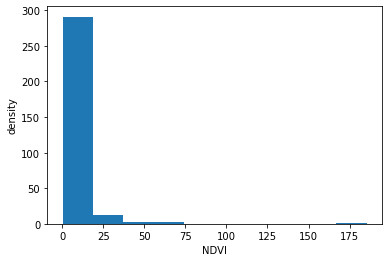

In [42]:
count, bins, ignored = plt.hist(greenhouse_gas['Emissions per km2 (kt CO2e)'], 10)
plt.xlabel("NDVI")
plt.ylabel("density")
plt.show()

In [43]:
df1 = greenhouse_gas.sort_values(by =['Emissions per km2 (kt CO2e)'], ascending=False, inplace = False)
df1

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,...,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,Local Authority Code,Local Authority,Region/Country,Calendar Year,Emissions per km2 (kt CO2e)
276,E09000001,City of London,England,London,E13000001,Inner London,277.0,E09000001,City of London,532382.0,...,-0.09351,51.515640,9644.056316,3.146884e+06,"POLYGON ((532140.296 182191.897, 532141.185 18...",E09000001,City of London,London,2020.0,185.523509
308,E09000033,Westminster,England,London,E13000001,Inner London,309.0,E09000033,Westminster,528268.0,...,-0.15295,51.512211,27258.578951,2.203779e+07,"POLYGON ((526755.127 183684.425, 526773.270 18...",E09000033,Westminster,London,2020.0,66.992695
295,E09000020,Kensington and Chelsea,England,London,E13000001,Inner London,296.0,E09000020,Kensington and Chelsea,525756.0,...,-0.18977,51.496479,21101.244339,1.238404e+07,"POLYGON ((523037.930 182716.717, 523036.773 18...",E09000020,Kensington and Chelsea,London,2020.0,56.156585
305,E09000030,Tower Hamlets,England,London,E13000001,Inner London,306.0,E09000030,Tower Hamlets,536340.0,...,-0.03647,51.515541,26818.136105,2.157691e+07,"POLYGON ((536776.386 184446.881, 536777.600 18...",E09000030,Tower Hamlets,London,2020.0,50.11174
282,E09000007,Camden,England,London,E13000001,Inner London,283.0,E09000007,Camden,527491.0,...,-0.16291,51.543049,26245.739182,2.177858e+07,"POLYGON ((527195.051 187578.405, 527201.395 18...",E09000007,Camden,London,2020.0,42.271671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,E07000029,Copeland,England,North West,E10000006,Cumbria,68.0,E07000029,Copeland,310871.0,...,-3.37664,54.466171,164133.681246,7.755410e+08,"POLYGON ((300801.304 524211.795, 300812.797 52...",E07000029,Copeland,North West,2020.0,0.475809
174,E07000166,Richmondshire,England,Yorkshire and The Humber,E10000023,North Yorkshire,175.0,E07000166,Richmondshire,401039.0,...,-1.98552,54.357609,221695.052013,1.318703e+09,"POLYGON ((419599.904 515687.695, 419618.100 51...",E07000166,Richmondshire,Yorkshire and the Humber,2020.0,0.472638
175,E07000167,Ryedale,England,Yorkshire and The Humber,E10000023,North Yorkshire,176.0,E07000167,Ryedale,475590.0,...,-0.84277,54.200211,249873.201633,1.506594e+09,"POLYGON ((465635.798 500678.302, 465814.997 50...",E07000167,Ryedale,Yorkshire and the Humber,2020.0,0.430043
49,E06000053,Isles of Scilly,England,South West,E06000053,Isles of Scilly,50.0,E06000053,Isles of Scilly,91327.0,...,-6.30217,49.923321,180298.504277,2.285143e+07,"MULTIPOLYGON (((84014.170 5445.450, 84021.580 ...",E06000053,Isles of Scilly,South West,2020.0,0.339494


<AxesSubplot:>

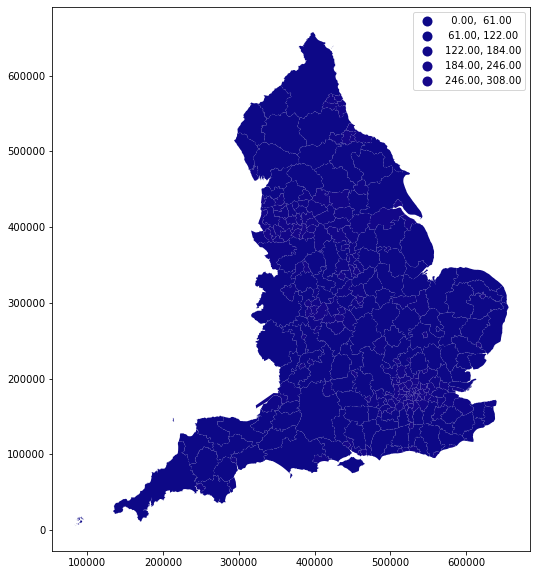

In [40]:
greenhouse_gas.plot(column='Emissions per km2 (kt CO2e)', cmap='plasma', 
         scheme='FisherJenks', k=5, edgecolor='None', legend=True, figsize=(10,10))